## **Análisis de Datos con Pandas**

El análisis de datos con pandas es crucial para extraer insights significativos de datos. A continuación, cubriremos técnicas importantes como la agregación, agrupación, pivoteo de tablas, y la visualización con Seaborn, así como la concatenación y el mergeo de DataFrames.

### **1. Agregación y Agrupación de Datos**

#### **Agregación**

La agregación permite resumir datos mediante funciones estadísticas.

**Ejemplo:**

In [1]:
import pandas as pd

data = {
    'Vendedor': ['Ana', 'Luis', 'Ana', 'Pedro', 'Luis'],
    'Ventas': [200, 150, 180, 300, 120],
    'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Enero']
}

df = pd.DataFrame(data)

# Calcular la venta total
venta_total = df['Ventas'].sum()

# Calcular la venta promedio
venta_promedio = df['Ventas'].mean()

print("Venta Total:", venta_total)
print("Venta Promedio:", venta_promedio)

Venta Total: 950
Venta Promedio: 190.0


#### **Agrupación**

La agrupación permite dividir el DataFrame en grupos basados en el valor de una o más columnas y aplicar funciones de agregación a cada grupo.

**Ejemplo:**

In [2]:
# Agrupar por Vendedor y calcular la venta total por vendedor
ventas_por_vendedor = df.groupby('Vendedor')['Ventas'].sum()
ventas_por_vendedor

Vendedor
Ana      380
Luis     270
Pedro    300
Name: Ventas, dtype: int64

In [3]:
# Agrupar por Mes y calcular la venta promedio por mes
ventas_por_mes = df.groupby('Mes')['Ventas'].mean()
ventas_por_mes

Mes
Enero      156.666667
Febrero    240.000000
Name: Ventas, dtype: float64

### **2. Pivoteo de Tablas**

El pivoteo transforma datos de un formato largo a uno ancho.

**Ejemplo:**

In [5]:
# Crear un DataFrame de ejemplo
data = {
    'Vendedor': ['Ana', 'Luis', 'Ana', 'Pedro', 'Luis'],
    'Ventas': [200, 150, 180, 300, 120],
    'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Enero']
}

df = pd.DataFrame(data)

# Crear una tabla dinámica
pivot_table = df.pivot_table(values='Ventas', index='Vendedor', columns='Mes', aggfunc='sum', fill_value=0)
pivot_table

Mes,Enero,Febrero
Vendedor,,
Ana,200,180
Luis,270,0
Pedro,0,300


### **3. Visualización con Seaborn**

#### **Instalación**

```bash
pip install seaborn
```

#### **Gráficos de Barras**

**Ejemplo:**

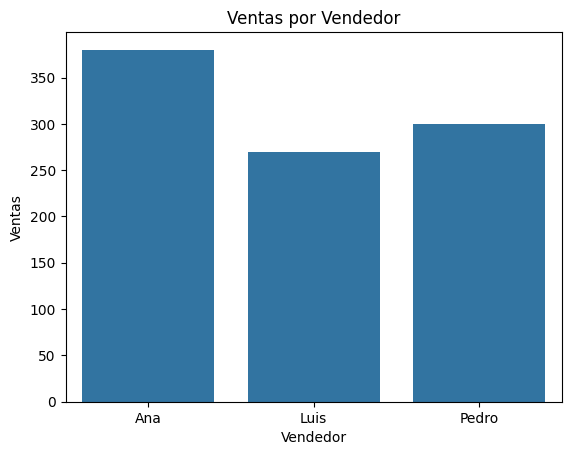

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Vendedor': ['Ana', 'Luis', 'Pedro'],
    'Ventas': [380, 270, 300]
}

df = pd.DataFrame(data)

sns.barplot(x='Vendedor', y='Ventas', data=df, )
plt.title('Ventas por Vendedor')
plt.xlabel('Vendedor')
plt.ylabel('Ventas')
plt.show()

#### **Series de Tiempo**

**Ejemplo:**

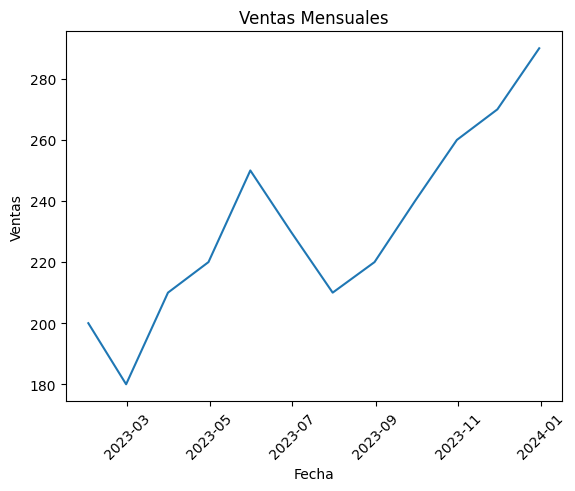

In [7]:
data = {
    'Fecha': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Ventas': [200, 180, 210, 220, 250, 230, 210, 220, 240, 260, 270, 290]
}

df = pd.DataFrame(data)

sns.lineplot(x='Fecha', y='Ventas', data=df)
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

### **4. Concatenación de DataFrames**

La concatenación permite unir DataFrames a lo largo de un eje (filas o columnas). Utiliza `pd.concat()` para combinar múltiples DataFrames.

**Ejemplo:**

In [9]:
# Crear DataFrames de ejemplo
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenar por filas
df_concat = pd.concat([df1, df2], axis=0)
print(df_concat)

# Concatenar por columnas
df_concat_col = pd.concat([df1, df2], axis=1)
print(df_concat_col)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8
   A  B  A  B
0  1  3  5  7
1  2  4  6  8


### **5. Mergeo de DataFrames**

El mergeo permite combinar DataFrames basados en valores comunes en columnas clave, similar a una operación JOIN en SQL. Utiliza `pd.merge()` para esto.

**Ejemplo:**

In [12]:
# Crear DataFrames de ejemplo
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Nombre': ['Ana', 'Luis', 'Pedro']})
df2 = pd.DataFrame({'ID': [1, 2, 4], 'Ventas': [200, 150, 300]})

# Mergear DataFrames en base a la columna 'ID'
df_merged = pd.merge(df1, df2, on='ID', how='inner')
df_merged

,ID,Nombre,Ventas
0,1,Ana,200
1,2,Luis,150


In [13]:
# Mergear DataFrames con una unión externa
df_merged_outer = pd.merge(df1, df2, on='ID', how='outer')
df_merged_outer

,ID,Nombre,Ventas
0,1,Ana,200.0
1,2,Luis,150.0
2,3,Pedro,NaN
3,4,NaN,300.0
